## Part I Review the online programming.

In [1]:
from collections import defaultdict

In [2]:
piece_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]

In [4]:
price = defaultdict(int)

for i in range(len(piece_price)):
    price[i + 1] = piece_price[i]
    
price[2]

5

In [5]:
from functools import lru_cache

In [6]:
def to_chunks(data):
    chunks = []
    
    for i in data:
        if isinstance(i, list):
            sub_data = to_chunks(i)
            for d in sub_data:
                chunks.append(d)
        else:
            chunks.append(i)
            
    return chunks
        

In [7]:
to_chunks([2, [6, [10, [10, [10, [10, [10, 10]]]]]]])

[2, 6, 10, 10, 10, 10, 10, 10]

In [8]:
# put recursive and solution together
@lru_cache(2*10000)
def get_price(num):
 
    max_price = price[num]
    steps = num
    # [price, steps]
    for i in range(1, num):
        left = get_price(i)
        right = get_price(num - i)
        if (max_price < left[0] + right[0]):
            max_price = left[0] + right[0]
            steps = to_chunks(left[1:] + right[1:])
        
    return [max_price, steps]

In [9]:
get_price(25)

[73, [2, 3, 10, 10]]

## Part1-2: Finish the Solution Parse Part of Edit-Distance

In [10]:
@lru_cache(maxsize=2**10)
def edit_distance(str1, str2):
    
    if not len(str1):return len(str2)
    
    if not len(str2):return len(str1)
    
    tail1 = str1[-1]
    tail2 = str2[-1]
    
    return min(edit_distance(str1[:-1], str2) + 1, # delete
                   edit_distance(str1, str2[:-1]) + 1, # add
                   edit_distance(str1[:-1], str2[:-1]) + (0 if tail1 == tail2 else 2)) # sub

In [11]:
edit_distance("ABCDE", "ABCCEF")

3

In [12]:
edit_distance('ATCGGAA', 'ATCGGGA')

2

In [13]:
solution = []

In [14]:
@lru_cache(maxsize=2**10)
def edit_distance_with_path(str1, str2):
    
    if not len(str1):return [len(str2), ' ']
    
    if not len(str2):return [len(str1), ' ']
    
    tail1 = str1[-1]
    tail2 = str2[-1]
     
    _del = edit_distance_with_path(str1[:-1], str2)
    _add = edit_distance_with_path(str1, str2[:-1])
    _sub = edit_distance_with_path(str1[:-1], str2[:-1])
    op_desc = {
        "del":" Del {}".format(tail1),
        "add":" Add {}".format(tail2),
        "sub0":"",
        "sub2":" Sub {}=>{}".format(tail1, tail2)
    }
    # [distance, operator]
    operator = [
        [_del[0] + 1, _del[1] + op_desc["del"]],
        [_add[0] + 1, _add[1] + op_desc["add"]],  
        [_sub[0] + (0 if tail1 == tail2 else 2), _sub[1] + op_desc["sub" + ('0' if tail1 == tail2 else '2')]],
    ]
    min_op =  min(operator, key=lambda x : x[0])
    return min_op

In [15]:
edit_distance_with_path("ABCDE", "ABCCEF")

[3, '  Add C Del D Add F']

In [16]:
edit_distance_with_path('ATCGGAA', 'ATCGGGA')

[2, '  Add G Del A']

## Part 2 Choose 1 - 2 books to keep reading:

* 数学之美
* Fluent Python

## Part 3: Answer following questions:


Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?

Ans: 将复杂问题分解为多个子问题
     动态规划涉及到状态转移，如何将复杂问题分解，找出复杂问题和子问题的关系，已达到减少运算的目的
     搜索是一种递归操作，动态规划不仅仅是递归，动态规划在于分解复杂问题，减少运算。

Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

Ans: 动态规划是一种解决问题的思想，适合轻量级的问题

Can you catch up at least 3 problems which could solved by Dynamic Programming?

Ans: 斐波那契数列，(图)最短路径，最长回文

Can you catch up at least 3 problems wich could sloved by Edit Distance?

Ans: 文本重复性检查，

Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

Ans: 递归，查表，(子)问题的解决方案
    
    将问题分解为多个子问题(递归)，使用子问题的计算结果(查表)，按要求计算子问题(解决方案)

What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:  吃内存，递归可能会过深

## (Optinal) Finish the k-person-salesman problem:

In [3]:
import random
import matplotlib.pylab as plt

In [4]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

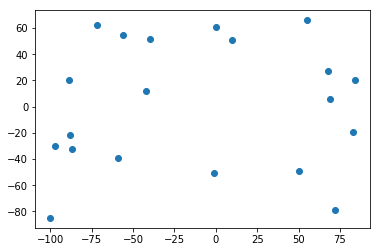

In [5]:
plt.scatter(latitudes, longitude)

In [51]:
coordinates = [(latitudes[i], longitude[i]) for i in range(len(latitudes))]
coordinates[0]

(-72, 62)

In [42]:
import numpy as np

In [43]:
np.linalg.norm(np.array((1,2))-np.array((3,4)))

2.8284271247461903

In [44]:
#@lru_cache(maxsize=2**10)
def shortest_distance(start, coordinates):
    min_dis = float("inf")
    min_coor = start
    list_coor = [coor for coor in coordinates]
    list_coor.remove(start)
    
    if len(list_coor) == 0:
        return 0
    
    for coor in list_coor:
        dis = np.linalg.norm(np.array(start)-np.array(coor))
        if dis < min_dis:
            min_dis = dis
            min_coor = coor
            
    min_dis += shortest_distance(min_coor, list_coor)
    
    return min_dis   

In [45]:
shortest_distance(coordinates[0], coordinates)

777.534631548254

In [62]:
from functools import lru_cache
@lru_cache(maxsize=2**10)
def shortest_distance_dynamic(start, coordi):

    min_dis = float("inf")
    min_coor = start
    list_coor = [coor for coor in coordi]
    list_coor.remove(start)
    
    print(len(list_coor))
    if len(list_coor) == 0:
        return 0, start

    for node in list_coor:
        dis, n = shortest_distance_dynamic(node, tuple(list_coor))
        if min_dis > dis:
            min_dis = dis
            min_coor = n
               
    return min_dis + np.linalg.norm(np.array(start)-np.array(min_coor)), start

In [63]:
shortest_distance_dynamic(coordinates[0], tuple(coordinates))

19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
1
0
2
1
1
0
2
1
1
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
5
4
4
4
4
4
6
5
5
5
5
5
5
7
6
6
5
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2


3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
5
4
4
4
4
4
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
5
4
4
4
4
4
6
5
5
5
5
5
5
7
6
6
6
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
5
6
7
6
6
6
6
6
5
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
5
4
4
4
4
4
6
5
5
5
5
5
5
7
6
6
6
6
6
6
5
5
5
5
5
5
4
4
4
4
4
6
5
5
5
5
5
5
7
6
6
6
6
6
6
6
5
5
5
5
5
5
7
6
6
6
6
6
6
6
8
7
6
5
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
3
3
3
3
4
4
6
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4


3
5
5
5
5
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
6
6
6
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
3
3
3
3
5
5
5
5
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
6
6
6
6
5
4
4
4
4
4
3
3
3
3
5
5
5
5
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
6
6
6
6
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
6
6
6
6
6
8
7
6
6
5
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
5
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3


1
2
3
2
2
2
3
4
3
3
3
2
2
2
3
4
3
3
3
3
4
5
4
4
3
3
2
2
1
1
0
2
3
2
2
2
1
1
3
4
3
3
3
2
2
2
1
1
3
4
3
3
3
3
2
2
2
4
5
4
4
4
3
3
3
2
2
2
1
1
3
4
3
3
3
3
2
2
2
4
5
4
4
4
4
3
3
3
3
2
2
2
4
5
4
4
4
4
4
3
3
3
3
5
6
5
5
4
4
3
3
2
2
1
1
2
3
2
2
2
3
4
3
3
3
2
2
2
3
4
3
3
3
3
4
5
4
4
4
3
3
3
2
2
2
1
1
3
4
3
3
3
3
2
2
2
4
5
4
4
4
4
3
3
3
3
2
2
2
4
5
4
4
4
4
4
3
3
3
3
5
6
5
5
5
4
4
4
3
3
3
2
2
2
3
4
3
3
3
3
4
5
4
4
4
4
3
3
3
3
2
2
2
4
5
4
4
4
4
4
3
3
3
3
5
6
5
5
5
5
4
4
4
4
3
3
3
3
4
5
4
4
4
4
4
5
6
5
5
5
5
5
4
4
4
4
4
5
6
5
5
5
5
5
5
4
4
4
4
4
6
7
6
6
5
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
4
4
4
3
3
3
2
2
2
3
4
3
3
3
3
4
5
4
4
4
4
3
3
3
3
2
2
2
4
5
4
4
4
4
4
3
3
3
3
5
6
5
5
5
5
4
4
4
4
3
3
3
3
4
5
4
4
4
4
4
5
6
5
5
5
5
5
4
4
4
4
4
5
6
5
5
5
5
5
5
4
4
4
4
4
6
7
6
6
6
5
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3


5
5
5
4
4
4
4
4
6
5
5
5
5
5
5
7
6
6
6
6
6
6
6
5
5
5
4
4
4
4
4
5
5
5
7
6
6
6
6
6
6
6
8
7
6
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
2
2
2
1
1
3
3
2
2
2
4
3
3
2
2
2
3
3
5
4
4
3
3
3
3
2
2
2
4
4
4
3
3
3
3
5
4
4
3
3
3
3
4
4
4
6
5
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
6
5
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
5
5
5
4
4
4
4
4
6
5
5
5
5
5
5
7
6
6
5
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6


2
4
3
3
3
3
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
3
3
3
3
5
5
5
5
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
6
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
3
3
3
3
5
5
5
5
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
6
6
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
3
3
3
3
5
5
5
5
5
4
4
4
4
4
6
5
4
4
4
4
4
5
5
5
5
5
7
6
6
6
6
6
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
5
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
4
4
4
4
4
3
3
3


7
6
6
6
6
6
6
6
8
7
6
5
4
3
2
1
1
0
2
2
1
1
3
2
2
2
1
1
3
3
2
2
2
4
3
3
2
2
2
1
1
3
3
2
2
2
4
3
3
3
3
2
2
2
4
4
3
3
3
3
5
4
4
3
3
2
2
2
1
1
3
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
4
4
4
4
4
6
5
5
4
4
3
3
2
2
2
1
1
3
3
2
2
2
4
3
3
3
3
2
2
2
4
4
3
3
3
3
5
4
4
4
3
3
3
3
2
2
2
4
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
5
4
4
4
4
4
6
5
5
5
4
4
4
3
3
3
3
2
2
2
4
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
5
4
4
4
4
4
6
5
5
5
5
4
4
4
4
4
3
3
3
3
5
5
4
4
4
4
4
6
5
5
5
5
5
5
4
4
4
4
4
6
6
5
5
5
5
5
5
7
6
6
5
5
4
4
3
3
2
2
1
1
0
2
1
1
3
2
2
2
1
1
3
2
2
2
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
3
3
3
2
2
2
1
1
3
2
2
2
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
3
3
3
3
2
2
2
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
4
4
4
4
4
6
5
5
5
4
4
4
3
3
3
2
2
2
3
2
2
2
4
4
3
3
3
3
5
4
4
4
4
4
3
3
3
3
5
5
4
4
4
4
4
6
5
5
5
5
4
4
4
4
4
3
3
3
3
5
5
4
4
4
4
4
6
5
5
5
5
5
5
4
4
4
4
4
6
6
5
5
5
5
5
5
7
6
6
6
5
5
5
4
4
4
3
3
3
2


KeyboardInterrupt: 

In [53]:
tuple(coordinates)

((-72, 62),
 (55, 66),
 (-59, -39),
 (84, 20),
 (-87, -32),
 (-56, 55),
 (68, 27),
 (-100, -85),
 (72, -79),
 (83, -19),
 (-97, -30),
 (69, 6),
 (50, -49),
 (10, 51),
 (-89, 20),
 (-1, -51),
 (-88, -22),
 (-40, 52),
 (-42, 12),
 (0, 61))